## Algoritmo di Metropolis: campionamento di orbitali atomici

### Introduzione 

Vogliamo testare l'algoritmo di Metropolis per campionare una distribuzione di probabilità. Per fare questo scegliamo la famiglia di funzioni che, in meccanica quantistica, descrivono  il moto di un elettrone in presenza di una carica elementare positiva (i.e. un protone). Queste funzioni d'onda sono descritta da:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

dove $(n, l, m)$ sono i numeri quantici che determinano lo stato dell'elettrone, $(r, \theta, \phi)$ è la posizione dell'elettrone in coordinate sferiche, $L$ e $Y$ sono alcune funzioni speciali. Secondo l'interpretazione data da Niels Bohr negli anni '20, il modulo quadro di queste funzioni rappresenta la densità di probabilità di trovare l'elettrone nell'intorno del punto indicato dalle coordinate.


### Implementazione

Per testare l'algoritmo ci siamo concentrati sulle due funzioni d'onda $\Psi_{1,0,0}$ (stato $1s$) e $\Psi_{2,1,0}$ (stato $2p$). Abbiamo quindi campionato con $10^6$ mosse le due distribuzioni di probabilità corrispondenti con il metodo di Metropolis, in particolare abbiamo:
- scelto un punto di partenza nello spazio 3-dimensionale;
- implementato un random walk 3d nel continuo con passi $a_{1s} $ e $a_{2p} $ per proporre una mossa$^1$;
- accettato la mossa con probabilità $A(x|y) = min[1, \frac{p(x)}{p(y)}]$;
- dopo aver fatto equilibrare il sistema, registrato $10^6$ punti generati secondo questo schema per entrambe le distribuzioni di probabilità.

Contemporaneamente abbiamo anche misurato il valore della distanza dall'origine e calcolato, con il metodo del blocking$^2$, i valori medi $\langle r \rangle_{1s}$ e $\langle r \rangle_{2p}$, da confrontare con quelli teorici calcolati analiticamente

$$
\langle r \rangle_{1s} = \frac{3}{2}  \hspace{1.5 cm} \langle r \rangle_{2p} = 5  \,.
$$

(in unità in cui il raggio di Bohr $a_0$ vale $1$, cioè quelle usate nella simulazione).

$\textit{Osservazione}$ 1

I valori dei passi $a_{1s} $ e $a_{2p} $ del random walk sono stati scelti dopo alcuni tentativi in modo da soddisfare la condizione $A(x|y) = min[1, \frac{p(x)}{p(y)}]$ ~ 50%.
Siamo dunque giunti alla scelta $a_{1s} = 1.2$ e $a_{2p} = 2.6 $ $(  a_{1s} = 1.2 a_0$ e $a_{2p} = 2.6 a_0 $ nel SI$)$.

$\textit{Osservazione}$ 2

In linea di principio il metodo del blocking si renderebbe necessario in uno schema come questo, in cui due misure del raggio sono fortemente correlate, essendo due step successivi di un random walk. In realtà, con la scelta dei passi da noi fatta, e contenuta nell'$\textit{Osservazione} $ 1, dopo un paio di step Monte Carlo le misure del raggio sono già scorrelate, poichè la dimensione del passo è dello stesso ordine di grandezza della dimensione della distribuzione di probabilità da campionare (i.e. è dell'ordine di grandezza della dimensione atomica nel SI): spostandoci facilmente da un estremo all'altro della distribuzione, le misure del raggio che ne derivano sono indipendenti fra di loro. Ne deriva anche che la dimensione del blocco può, in linea di principio, essere scelta anche di pochi passi, senza incorrere in problemi dovuti alle correlazioni. In ogni caso la dimensione scelta da noi, avendo un totale di $10^6$ punti divisi in $100$ blocchi, era di $10^4$ passi per blocco.

### Risultati e grafici

Per entrambe le distribuzioni mostriamo :
- uno scatterplot tridimensionale con i $10^6$ punti che abbiamo accumulato durante le simulazioni;
- il grafico del valor medio del raggio con la deviazione standard, all'aumentare del numero di blocchi considerati.

Sotto i grafici è riportato il valore del raggio nell'ultimo blocco, quindi la misura più precisa.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def error(AV1,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV1[n] - AV2[n])/n)

#### Ground state (1, 0, 0)


<IPython.core.display.Javascript object>


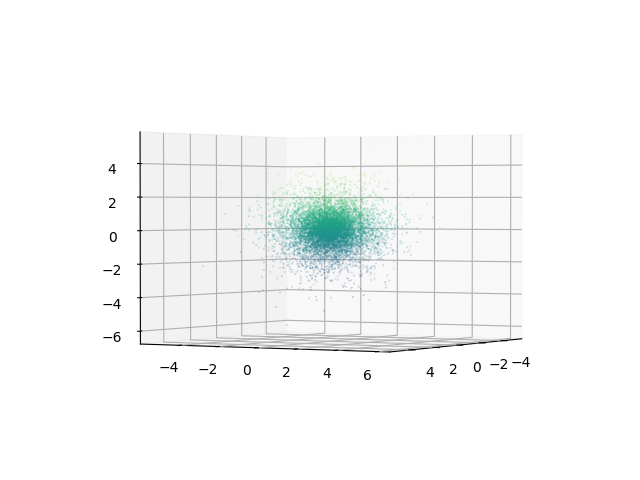

Orbitale ( 1.0 0.0 0.0 )


In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/State_1s.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z, s= 0.1,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.05,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


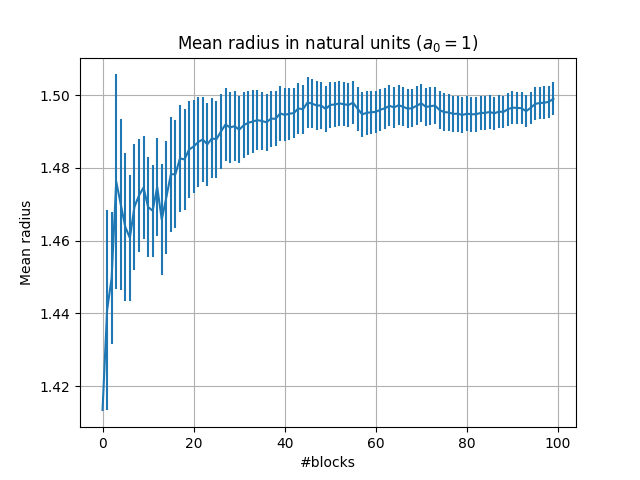

Valor medio del raggio per lo stato ( 1.0 , 0.0 , 0.0 ): 1.49903 +/- 0.004483415004325075


In [9]:
fig= plt.figure()
Rave, R2ave, Rave2 = np.loadtxt("Uniform/R_1s.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

#### Primo stato eccitato (2, 1, 0)

<IPython.core.display.Javascript object>


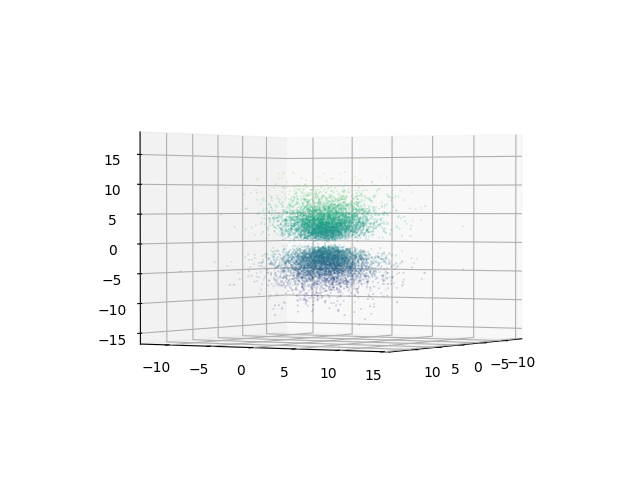

Orbitale ( 2.0 1.0 0.0 )


In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/State_2p.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z, s= 0.1,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.05,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


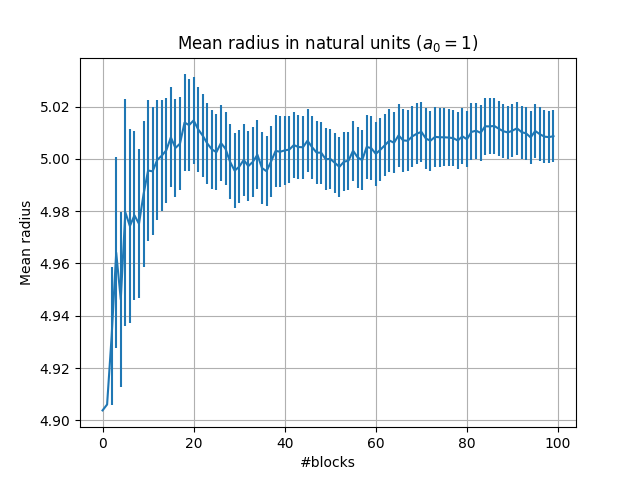

Valor medio del raggio per lo stato ( 2.0 , 1.0 , 0.0 ): 5.00867 +/- 0.009949366763261048


In [11]:
fig= plt.figure()
Rave, R2ave, Rave2 = np.loadtxt("Uniform/R_2p.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

### Passi gaussiani

Ci siamo a questo punto chiesti se e cosa cambiasse se, invece che muoverci nello spazio 3-dimensionale tramite un random walk nel contiuno avessimo scelto di muoverci scegliendo ad ogni istante per ogni coordinata uno "step" estratto da una gaussiana centrata in 0 e con varianza $\sigma$. In particolare, come è deve essere legato $\sigma$ al passo del random walk nel continuo di prima per avere risultati simili? Per trovare questa relazione basta considerare che, data la legge di evoluzione 

$$
X_{i+1}^\alpha = X_i^\alpha + \mathcal w \hspace{0.5 cm} con \; p(\mathcal w) = \mathcal N(0, \sigma)\,, \, \alpha = 1, 2, 3
$$

in 3 dimensioni vale che

$$
\langle |\vec R_{i+1} - \vec R_i |^2 \rangle =  \big\langle \sum_\alpha^3 (X_i^\alpha + \mathcal w - X_i^\alpha )^2 \big \rangle = 3 \langle \mathcal w^2 \rangle = 3\sigma^2.
$$

e quindi confrontando con il caso precedente, in cui si aveva sempre

$$
|\vec R_{i+1} - \vec R_i |^2 = a^2
$$

si capisce che per avere mediamente lo stesso effetto nei due casi si deve porre 

$$
\sigma = \frac{a}{\sqrt3}\,.
$$

Abbiamo effettivamente verificato che operando in questo modo l'accettazione delle mosse viene prossima al 50%. 

I risultati ottenuti sono a questo punto identici (in senso di probabilità) a quelli trovati nella fase precedente.

<IPython.core.display.Javascript object>


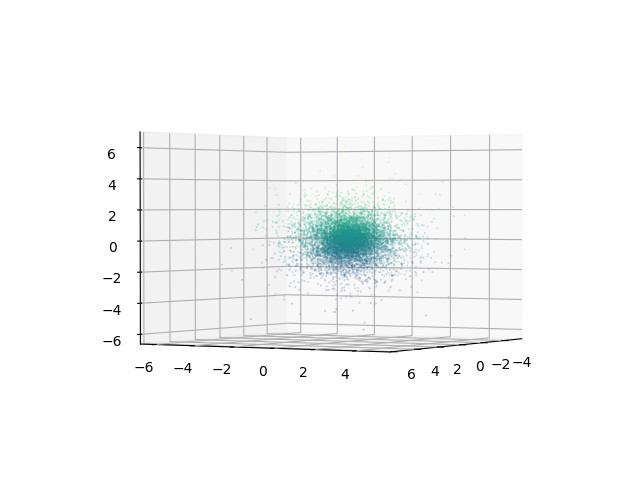

Orbitale ( 1.0 0.0 0.0 )


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Gaussian/state_1.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z, s= 0.1,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.05,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


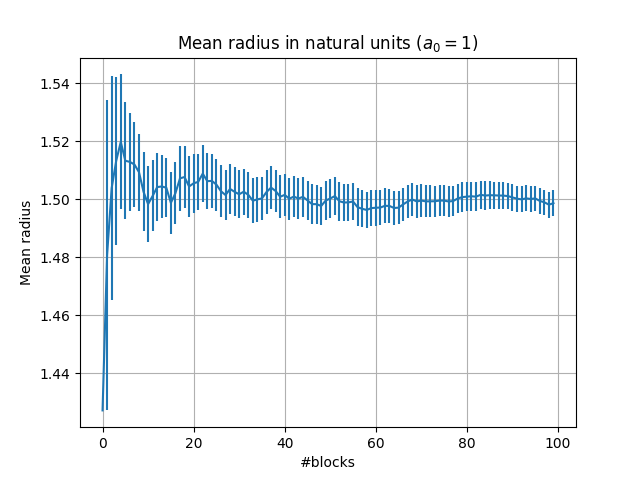

Valor medio del raggio per lo stato ( 2.0 , 1.0 , 0.0 ): 1.4986539 +/- 0.004409470982264827


In [21]:
fig= plt.figure()
Rave, R2ave, Rave2 = np.loadtxt("Gaussian/R1_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

<IPython.core.display.Javascript object>


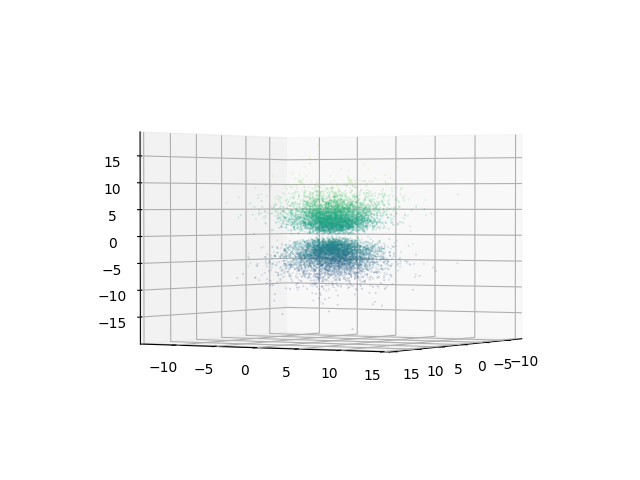

Orbitale ( 2.0 1.0 0.0 )


In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Gaussian/state_2.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z, s= 0.1,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.05,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


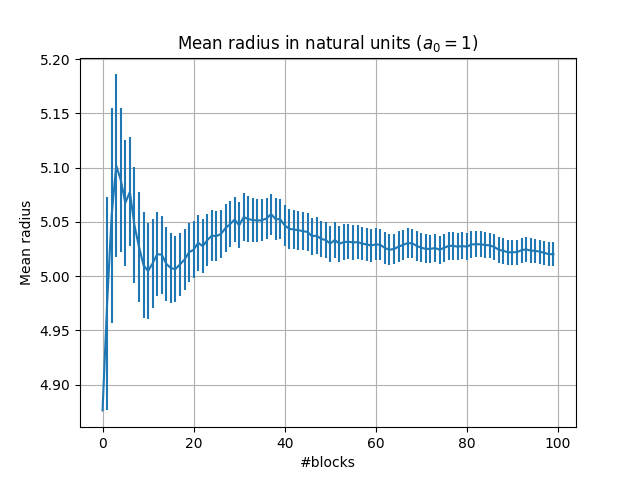

Valor medio del raggio per lo stato ( 2.0 , 1.0 , 0.0 ): 5.0201848 +/- 0.010949747471835344


In [22]:
fig= plt.figure()
Rave, R2ave, Rave2 = np.loadtxt("Gaussian/R2_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

###  Alcuni orbitali più alti

In questa fase abbiamo aggiunto alcuni orbitali con numeri quantici più alti, campionati tramite un random walk nel continuo come nel primo caso. Osserviamo che mentre per gli orbitali dell'esercizio il passo del random walk è stato scelto in modo da avere un'accettazione Metropolis prossima al 50%, in questa fase non si è stati altrettanto precisi e si è utilizzato un passo uguale in tutti i casi $a = 3$, il che ha causato in molti casi accettazioni anche ben superiori rispetto al 50% (orbitale più esteso $\rightarrow a = 3$ è piccolo rispetto alla variazione della funzione d'onda).

Vediamo alcuni esempi.

<IPython.core.display.Javascript object>


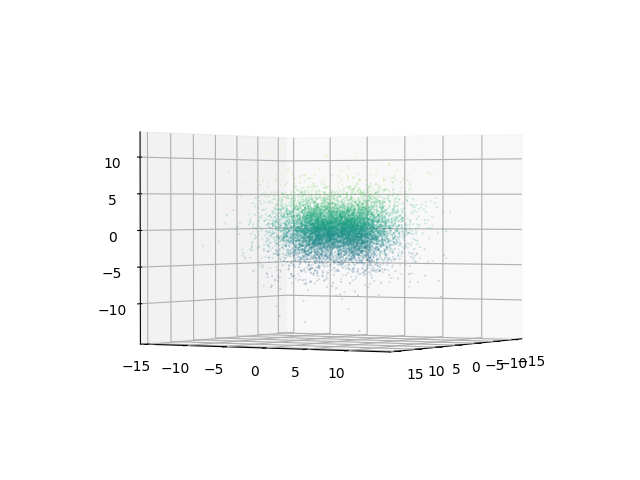

Orbitale ( 2.0 1.0 1.0 )


In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/state_1.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z, s= 0.1,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.05,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


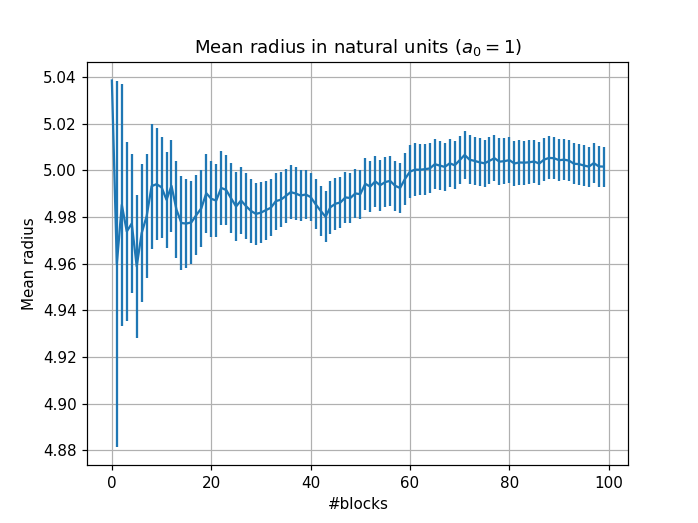

Mean value of the radius in natural units for the orbital ( 2.0 , 1.0 , 1.0 )
5.0016019 +o- 0.008605729827189506


In [2]:
fig= plt.figure()
Rave, R2ave, Rave2 = np.loadtxt("Uniform/R1_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

<IPython.core.display.Javascript object>


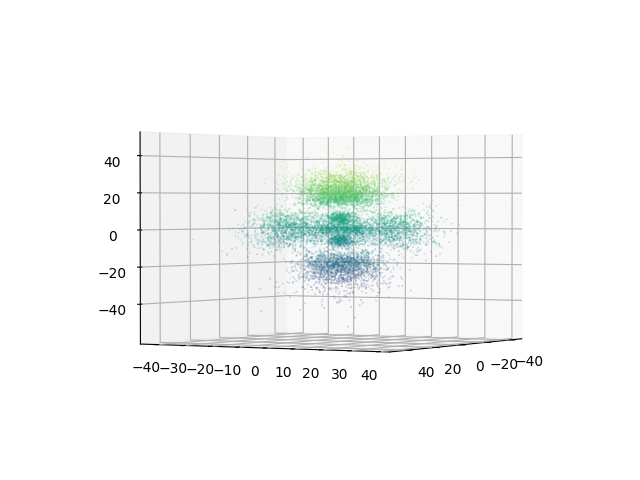

Orbitale ( 4.0 2.0 0.0 )


In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/state_2.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0] 
print('Orbitale (', n, l, m, ')')

ax.scatter(x, y, z,s= 0.1, c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.005,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


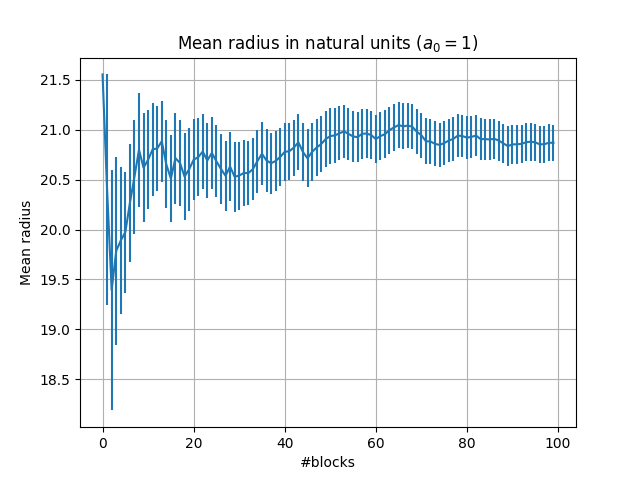

Valor medio del raggio per lo stato ( 4.0 , 2.0 , 0.0 ): 20.8678948 +/- 0.18172298543206775


In [15]:
fig= plt.figure()

Rave, R2ave, Rave2 = np.loadtxt("Uniform/R2_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

<IPython.core.display.Javascript object>


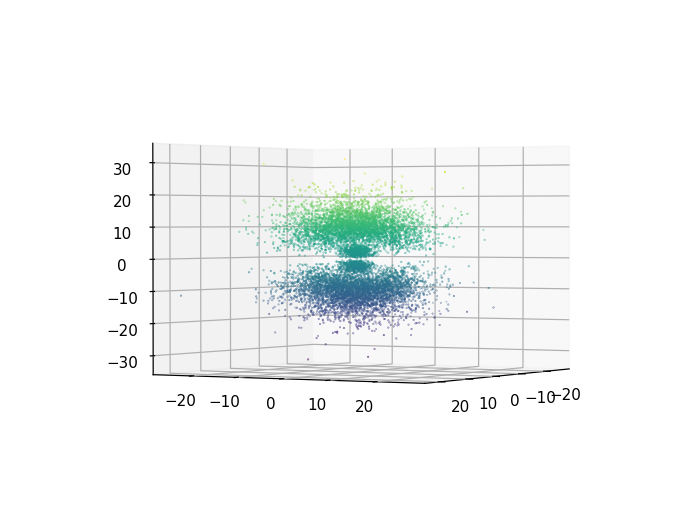

Orbitale ( 3.0 1.0 0.0 )


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/state_3.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0]
print('Orbitale (', n, l, m, ')')

for i in range(d-1):
    x[i] = x[i+1] 
    y[i] = y[i+1] 
    z[i] = z[i+1] 
ax.scatter(x, y, z, s= 0.5,c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.01,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


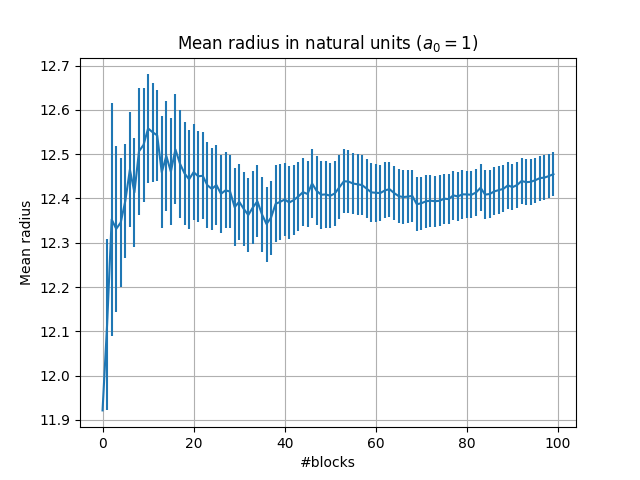

Valor medio del raggio per lo stato ( 4.0 , 2.0 , 0.0 ): 12.4549333 +/- 0.04947970709433576


In [16]:
fig= plt.figure()

Rave, R2ave, Rave2 = np.loadtxt("Uniform/R3_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])

<IPython.core.display.Javascript object>


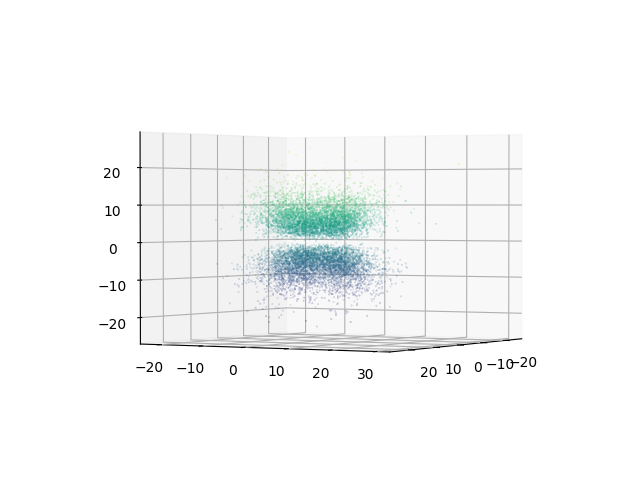

Orbitale ( 3.0 2.0 1.0 )


In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.loadtxt("Uniform/state_4.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
d = len(x)
n = x[0]
l = y[0]
m = z[0]
print('Orbitale (', n, l, m, ')')

for i in range(d-1):
    x[i] = x[i+1] 
    y[i] = y[i+1] 
    z[i] = z[i+1] 
ax.scatter(x, y, z, s= 0.1, c = z, marker = '.')
#ax.plot3D(x, y, z, linewidth = 0.01,  marker = ' ')

ax.view_init(1, 30)
plt.show()

<IPython.core.display.Javascript object>


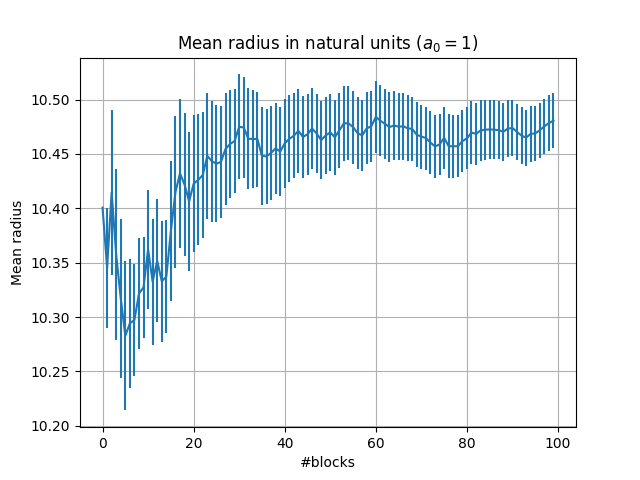

Valor medio del raggio per lo stato ( 3.0 , 2.0 , 1.0 ): 10.4806085 +/- 0.025186476249341592


In [18]:
fig= plt.figure()

Rave, R2ave, Rave2 = np.loadtxt("Uniform/R4_mean.out", usecols= (0, 1, 2), delimiter = ' ', unpack = True)
N = len (Rave)
x = np.arange(N)
e = np.zeros(N)
for i in range(N):
    e[i] = error(R2ave, Rave2, i)
    
plt.errorbar(x, Rave, e)
plt.xlabel('#blocks')
plt.ylabel('Mean radius')
plt.title('Mean radius in natural units ($a_0 = 1$)')
plt.grid()

print('Valor medio del raggio per lo stato (', n, ',', l,',', m, '):', Rave[N-1],'+/-',e[N-1])